# Plot OpenFAST Outputs

In [1]:
# Load all the tools
import numpy as np
import os
import subprocess

# Instantiate fast_IO
from rosco.toolbox.ofTools.fast_io import output_processing

from rosco.toolbox.ofTools.util import spectral

import pandas as pd

import matplotlib.pyplot as plt
# %matplotlib

i_fig = 0

# Set outputs
This output example is generated by running `examples/17_IEA22_Optimization/driver_weis_openfast_opt.py`

In [2]:
outfiles = [
    'outputs/openfast_runs/DLC1.1_0_IEA_22_Semi_0.outb',
]

# outfiles

Fl_Pitcom is not available as an output channel.
PC_MinPit is not available as an output channel.
WE_Vw is not available as an output channel.


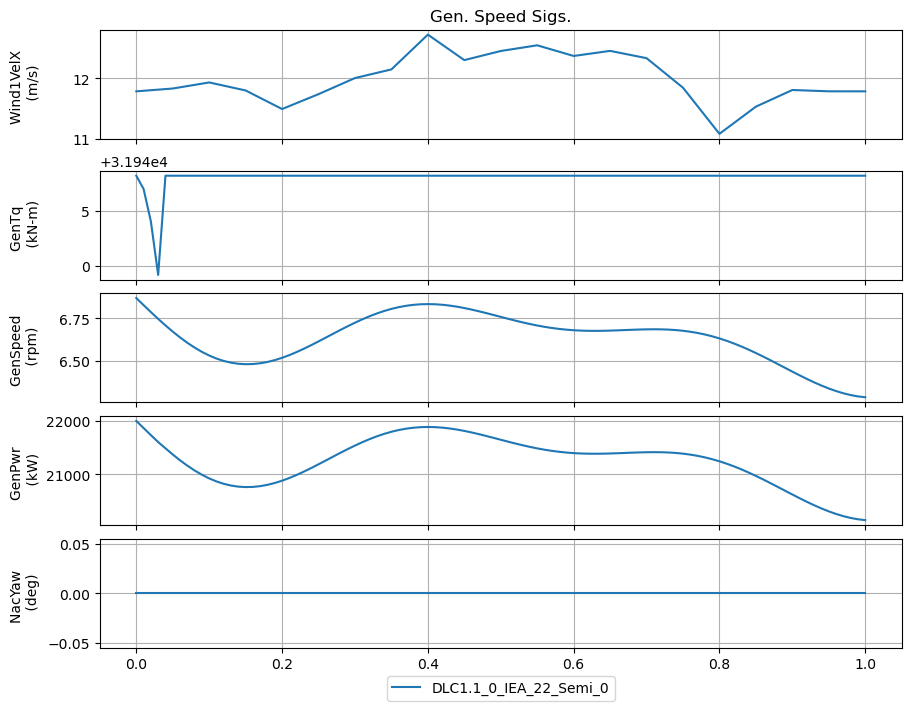

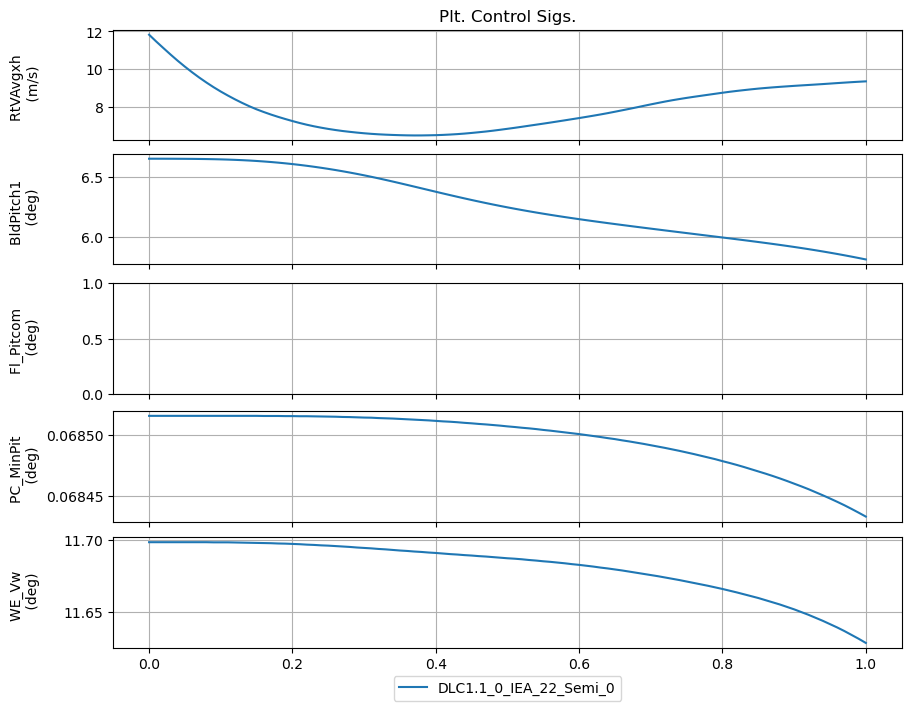

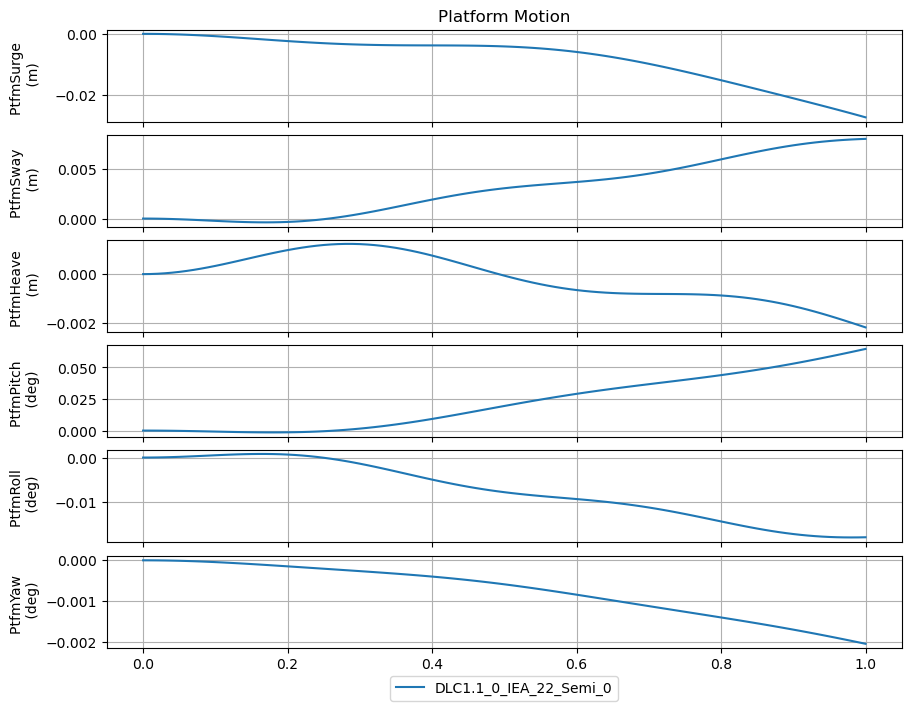

In [3]:
output_ext = '.out'
plt.rcParams["figure.figsize"] = [9,7]

ROSCO = True   # Include RO.dbg file in output dict
ROSCO2 = False  # Include RO.dbg2 file in output dict

#  Define Plot cases 
cases = {}
cases['Gen. Speed Sigs.'] = ['Wind1VelX', 'GenTq', 'GenSpeed','GenPwr','NacYaw']#,'PtfmPitch','PtfmYaw','NacYaw']
cases['Plt. Control Sigs.'] = ['RtVAvgxh', 'BldPitch1', 'Fl_Pitcom', 'PC_MinPit','WE_Vw']
cases['Platform Motion'] = ['PtfmSurge', 'PtfmSway', 'PtfmHeave', 'PtfmPitch','PtfmRoll','PtfmYaw']
# cases['Rot Thrust'] = ['RtVAvgxh','BldPitch1','RotThrust']

op = output_processing.output_processing()
op_RO = output_processing.output_processing()
op_RO2 = output_processing.output_processing()


fast_out = []
fast_out = op.load_fast_out(outfiles, tmin=0)
if ROSCO:
    # Rosco outfiles
    r_outfiles = [out.split('.out')[0] + '.RO.dbg' for out in outfiles]
    rosco_out = op_RO.load_fast_out(r_outfiles, tmin=0)
    
    if ROSCO2:
        r_outfiles = [out.split('.out')[0] + '.RO.dbg2' for out in outfiles]
        rosco_out2 = op_RO2.load_fast_out(r_outfiles, tmin=0)
  
# Combine outputs
if ROSCO:
    comb_out = [None] * len(fast_out)
    for i, (r_out, f_out) in enumerate(zip(rosco_out,fast_out)):
        r_out.update(f_out)
        comb_out[i] = r_out
    if ROSCO2:
        for i, (r_out2, f_out) in enumerate(zip(rosco_out2,comb_out)):
            r_out2.update(f_out)
            comb_out[i] = r_out2
else:
    comb_out = fast_out

    
# Plot
fig, ax = op.plot_fast_out(comb_out,cases, showplot=True)

if False:  # Print!
    
    save_fig_dir = '.'
    for f in fig:
        f.savefig(os.path.join(save_fig_dir,'ts'+str(i_fig)))
        i_fig += 1

# Plot Spectra

Text(0, 0.5, 'PSD')

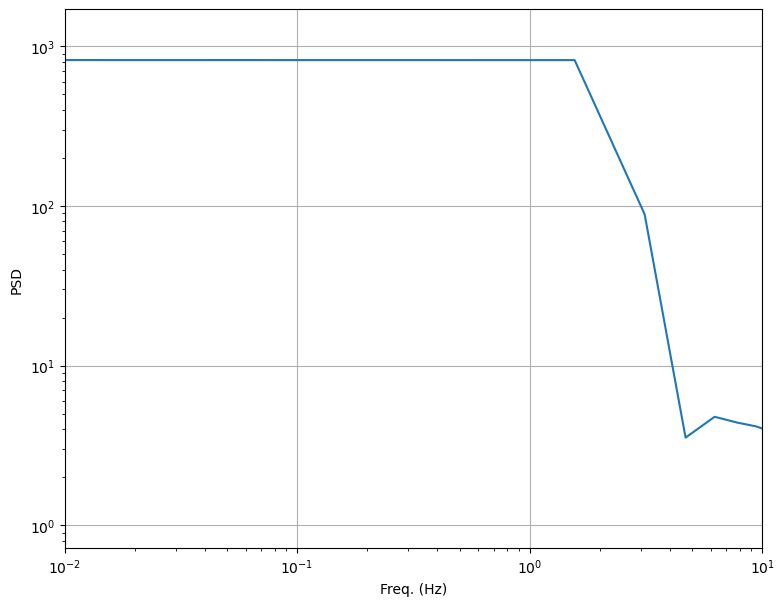

In [4]:

df = pd.DataFrame()

for i in range(len(outfiles)):
    fq, y, _ = spectral.fft_wrap(
                        fast_out[i]['Time'], fast_out[i]['RotThrust'], averaging='Welch', averaging_window='Hamming', output_type='psd')

    plt.plot(fq,np.sqrt(y))
    
    df['fq_'+str(i)] = fq
    df['psd_'+str(i)] = y
    
#     fq, y, _ = spectral.fft_wrap(
#                         fast_out[i]['Time'], fast_out[i]['RtVAvgxh'], averaging='Welch', averaging_window='Hamming', output_type='psd')

#     plt.plot(fq,np.sqrt(y))
    
#     fq, y, _ = spectral.fft_wrap(
#                     fast_out[i]['Time'], fast_out[i]['Wind1VelX'], averaging='Welch', averaging_window='Hamming', output_type='psd')

#     plt.plot(fq,np.sqrt(y))
    
    
plt.yscale('log')
plt.xscale('log')

plt.xlim([1e-2,10])
plt.grid('True')

plt.xlabel('Freq. (Hz)')
plt.ylabel('PSD')


